Cleaning The Dataset

In [5]:
import tensorflow as tf
import os
import cv2
import imghdr

DatasetDir = 'Brain_Stroke_CT-SCAN_image'

ImageExts = ['jpeg', 'jpg', 'bmp', 'png']

for ImageClass in os.listdir(DatasetDir): 
    for Image in os.listdir(os.path.join(DatasetDir, ImageClass)):
        ImagePath = os.path.join(DatasetDir, ImageClass, Image)
        try: 
            Img = cv2.imread(ImagePath)
            ImgExt = imghdr.what(ImagePath)
            if ImgExt not in ImageExts:
                print(f'This image is going to be deleted because it\'s extension is not compatible : {ImagePath}')
                os.remove(ImagePath)
        except Exception as e:
            print(f'Issue with image {ImagePath}')

Issue with image Brain_Stroke_CT-SCAN_image\Test\Normal
Issue with image Brain_Stroke_CT-SCAN_image\Test\Stroke
Issue with image Brain_Stroke_CT-SCAN_image\Train\Normal
Issue with image Brain_Stroke_CT-SCAN_image\Train\Stroke
Issue with image Brain_Stroke_CT-SCAN_image\Validation\Normal
Issue with image Brain_Stroke_CT-SCAN_image\Validation\Stroke


Loading the Dataset

Found 1843 files belonging to 2 classes.
Found 437 files belonging to 2 classes.
Found 235 files belonging to 2 classes.


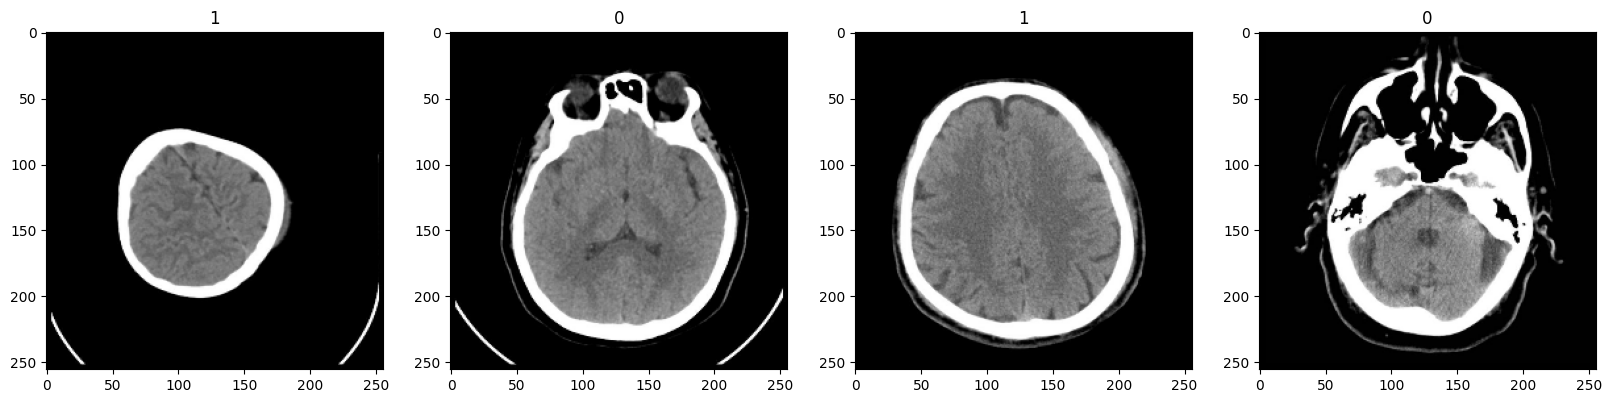

In [7]:
import numpy as np
from matplotlib import pyplot as plt

TrainingData = tf.keras.utils.image_dataset_from_directory('Brain_Stroke_CT-SCAN_image/Train').map(lambda x,y: (x/255, y))
TestingData = tf.keras.utils.image_dataset_from_directory('Brain_Stroke_CT-SCAN_image/Test').map(lambda x,y: (x/255, y))
ValidationData = tf.keras.utils.image_dataset_from_directory('Brain_Stroke_CT-SCAN_image/Validation').map(lambda x,y: (x/255, y))

DataIterator = TrainingData.as_numpy_iterator()

Batch = DataIterator.next()

Fig, ax = plt.subplots(ncols=4, figsize=(20,20))

for idx, img in enumerate(Batch[0][:4]):
    ax[idx].imshow(img.astype(float))
    ax[idx].title.set_text(Batch[1][idx])

The Deep Learning Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

Model = Sequential()

Model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
Model.add(MaxPooling2D())
Model.add(Conv2D(32, (3,3), 1, activation='relu'))
Model.add(MaxPooling2D())
Model.add(Conv2D(16, (3,3), 1, activation='relu'))
Model.add(MaxPooling2D())
Model.add(Flatten())
Model.add(Dense(256, activation='relu'))
Model.add(Dense(1, activation='sigmoid'))

Model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

Model.summary()

c:\Users\Sri_S\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 16)     │         4,624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 14400)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     3,686,656 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

Training the Model

In [9]:
LogDir='logs'
Tensorboard_Callback = tf.keras.callbacks.TensorBoard(log_dir=LogDir)
History = Model.fit(TrainingData, epochs=20, validation_data=ValidationData, callbacks=[Tensorboard_Callback])

Epoch 1/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 16s 230ms/step - accuracy: 0.6299 - loss: 0.6395 - val_accuracy: 0.8511 - val_loss: 0.3692
Epoch 2/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 14s 233ms/step - accuracy: 0.8827 - loss: 0.3011 - val_accuracy: 0.9447 - val_loss: 0.1425
Epoch 3/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 222ms/step - accuracy: 0.9650 - loss: 0.0994 - val_accuracy: 0.9617 - val_loss: 0.1035
Epoch 4/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 219ms/step - accuracy: 0.9813 - loss: 0.0474 - val_accuracy: 0.9617 - val_loss: 0.0772
Epoch 5/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 214ms/step - accuracy: 0.9916 - loss: 0.0296 - val_accuracy: 0.9574 - val_loss: 0.1039
Epoch 6/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 212ms/step - accuracy: 0.9977 - loss: 0.0121 - val_accuracy: 0.9617 - val_loss: 0.0791
Epoch 7/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 215ms/step - accuracy: 0.9900 - loss: 0.0269 - val_accuracy: 0.9830 - val_loss: 0.0518
Epoch 8/20
58/58 ━━━━━━━━━━━━━━━━━━━━ 13s 221ms/step - accuracy: 0.9992 - loss: 0.0038 - val_accu

Model Performance

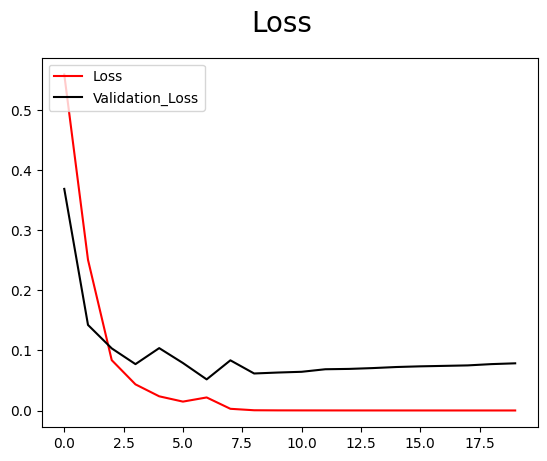

In [10]:
Fig = plt.figure()
plt.plot(History.history['loss'], color='red', label='Loss')
plt.plot(History.history['val_loss'], color='black', label='Validation_Loss')
Fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

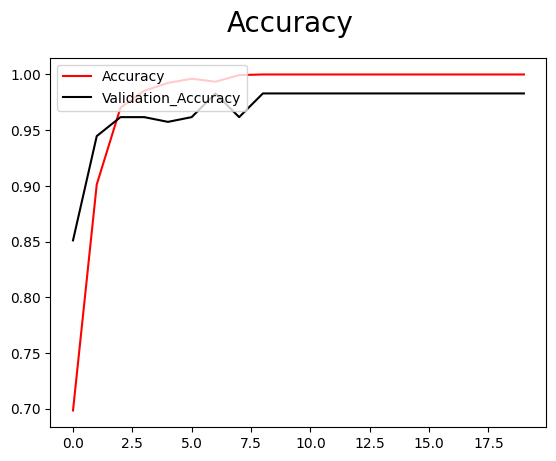

In [11]:
Fig = plt.figure()
plt.plot(History.history['accuracy'], color='red', label='Accuracy')
plt.plot(History.history['val_accuracy'], color='black', label='Validation_Accuracy')
Fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluation

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 134ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 416ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
Confusion Matrix:
[[293.  14.]
 [  5. 125.]]


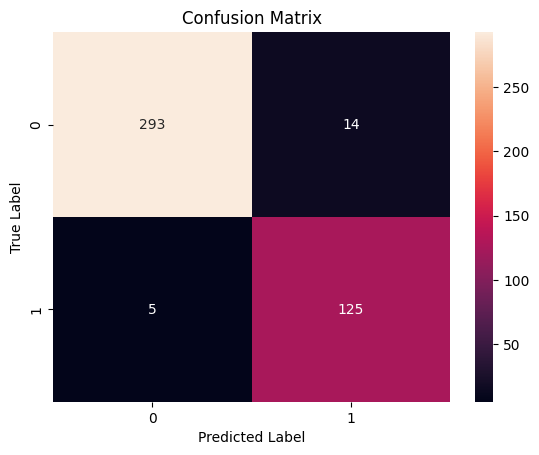

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Initialize metrics
Precision = Precision()
Recall = Recall()
Accuracy = BinaryAccuracy()


cm = np.zeros((2, 2))  

for Batch in TestingData.as_numpy_iterator():
  X, y = Batch
  yhat = Model.predict(X)

  # Update metrics
  Precision.update_state(y, yhat)
  Recall.update_state(y, yhat)
  Accuracy.update_state(y, yhat)

 
  cm += confusion_matrix(y, yhat.round())  

precision = Precision.result().numpy()
recall = Recall.result().numpy()
accuracy = Accuracy.result().numpy()


print("Confusion Matrix:")
print(cm)


class_labels = ["Normal", "Stroke"]  


cm_int = cm.astype(int)  # Convert to integer type


sns.heatmap(cm_int, annot=True, fmt="d")  # Use 'd' format for integers
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [13]:
print(f"Precision : {Precision.result()}, Recall : {Recall.result()}, Accuracy : {Accuracy.result()}")

Precision : 0.8992805480957031, Recall : 0.9615384340286255, Accuracy : 0.95652174949646


Testing the Model

In [25]:
# import cv2

# Img = cv2.imread('Dataset/Normal/1 (09).jpg')
# # plt.imshow(Img)
# # plt.show()

# ResizedImg = tf.image.resize(Img,(256,256))
# plt.imshow(ResizedImg.numpy().astype(int))
# plt.show()

import cv2
import tensorflow as tf
import matplotlib.pyplot as plt

Img = cv2.imread('Dataset/Normal/1 (09).jpg')

if Img is None:
    print("Image not found or path is incorrect.")
else:
    Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)  # Optional: convert from BGR to RGB
    ResizedImg = tf.image.resize(Img, (256, 256))
    plt.imshow(ResizedImg.numpy().astype(int))
    plt.show()


Image not found or path is incorrect.


In [29]:
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

# Load the image
Img = cv2.imread('Dataset/Normal/1 (09).jpg')

if Img is None:
    print("Image not found or path is incorrect.")
else:
    # Convert BGR to RGB
    Img = cv2.cvtColor(Img, cv2.COLOR_BGR2RGB)

    # Resize
    ResizedImg = tf.image.resize(Img, (256, 256))

    # Show the image
    plt.imshow(ResizedImg.numpy().astype(int))
    plt.show()

    # Normalize and predict
    yhat = Model.predict(np.expand_dims(ResizedImg / 255.0, 0))

    print(yhat)

    if yhat > 0.5: 
        print(f'Predicted class is Stroke')
    else:
        print(f'Predicted class is Normal')


Image not found or path is incorrect.


Saving the Model

In [34]:
from tensorflow.keras.models import load_model

Model.save('BrainStrokeClassifier.keras')


In [35]:
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.65%
